In [1]:
import torch
from torchvision.models import resnet18  
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

C:\Users\Devi B\anaconda3\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [7]:
import torch
import torchvision.models as models
import torch.nn as nn

# Define the model
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 2)  # Adjust for your number of classes

# Load the state dictionary safely
model_path = 'project_classifier.pth'
try:
    model.load_state_dict(torch.load(model_path, weights_only=True))
except RuntimeError as e:
    print(f"Error loading model: {e}")

model.eval()


Error loading model: Error(s) in loading state_dict for ResNet:
	size mismatch for fc.weight: copying a param with shape torch.Size([1000, 512]) from checkpoint, the shape in current model is torch.Size([2, 512]).
	size mismatch for fc.bias: copying a param with shape torch.Size([1000]) from checkpoint, the shape in current model is torch.Size([2]).


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [8]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

The predicted class for the image is: Ramya


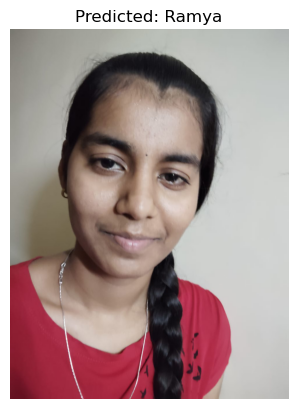

In [12]:
def load_image(image_path):
    image = Image.open(image_path)
    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension
    return image

def predict_image(model, image_path):
    image = load_image(image_path)
    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    return "DEVI" if predicted.item() == 0 else "Ramya"

def plot_image(image_path, prediction):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'Predicted: {prediction}')
    plt.axis('off')
    plt.show()

# Example usage
image_path = r"C:\Users\Devi B\Desktop\WhatsApp Image 2024-08-01 at 10.18.33 PM.jpeg"
prediction = predict_image(model, image_path)
print(f'The predicted class for the image is: {prediction}')
plot_image(image_path, prediction)